# Data Science Lab 1 - Iris dataset

The goal is to determine wether or not the various classes of Iris are separated.

## Method 1 - distances

In [1]:
import pandas as pd
import numpy as np

In [2]:
iris = pd.read_csv("../data/iris_cleaned.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,virginica
142,6.3,2.5,5.0,1.9,virginica
143,6.5,3.0,5.2,2.0,virginica
144,6.2,3.4,5.4,2.3,virginica


### Pair distances

In [3]:
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from methods import pair_distances

for i in range(2, 5):
    for comb in combinations(iris.columns[:-1], i):
        print(i, comb)
        
        iris_comb = iris[list(comb)].copy()
        x_scaled = StandardScaler().fit_transform(iris_comb)
        iris_comb["species"] = iris.species
        iris_scaled = pd.DataFrame(x_scaled, columns=iris_comb.columns[:-1])
        iris_scaled["species"] = iris.species
        iris_cov_scaled = np.cov(iris_scaled.drop('species', axis=1).transpose())
        
        print(pair_distances(iris_comb, iris_cov_scaled)[["separated_euclid", "separated_mahala"]])

2 ('sepal_length', 'sepal_width')
   separated_euclid  separated_mahala
0             False             False
1             False             False
2             False             False
3             False             False
4             False             False
5             False             False
2 ('sepal_length', 'petal_length')
   separated_euclid  separated_mahala
0              True              True
1              True              True
2              True              True
3              True              True
4             False             False
5             False             False
2 ('sepal_length', 'petal_width')
   separated_euclid  separated_mahala
0             False             False
1             False             False
2              True             False
3              True             False
4             False             False
5             False             False
2 ('sepal_width', 'petal_length')
   separated_euclid  separated_mahala
0              True        

We can conclude that *setosa* and *versicolor* are separated, as well as *setosa* and *virginica*.

However, we cannot assert that *versicolor* and *virginica* are separated.

## Method 2 - visualisation

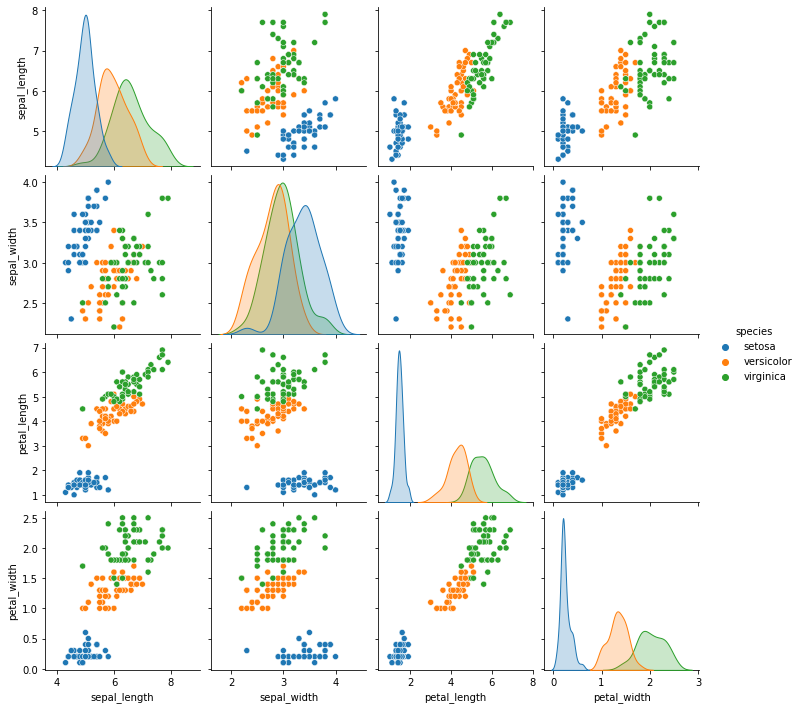

In [4]:
from seaborn import pairplot

pairplot(iris, hue='species')

We can see that in each case we distinguish (more or less) clearly the three types of flowers. We can therefore conclude that each variable carries information (typically statistical variance) about the type of flower independently.

If we could choose only one variable, it might be the width of the petals, but the results would be far from perfect. In fact, *virginica* and *versicolor* slightly overlap so are not linearly separable. Thus, let's transform variables and apply PCA to solve this.